# LetsGrowMore Virtual Internship Program(Feb 2022 - Mar 2022)

# BY: Aniket Sutar

# Beginner Level Task

# Task 2: Stock Market Prediction and Forecasting Using Stacked LSTM

## Import Libraries

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Import Dataset

In [85]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")

In [86]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


# Shape of data

In [87]:
df.shape

(2035, 8)

## Gathering information about the data

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [89]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [90]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

# Data Cleaning

In [91]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [92]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

# Data Visualization

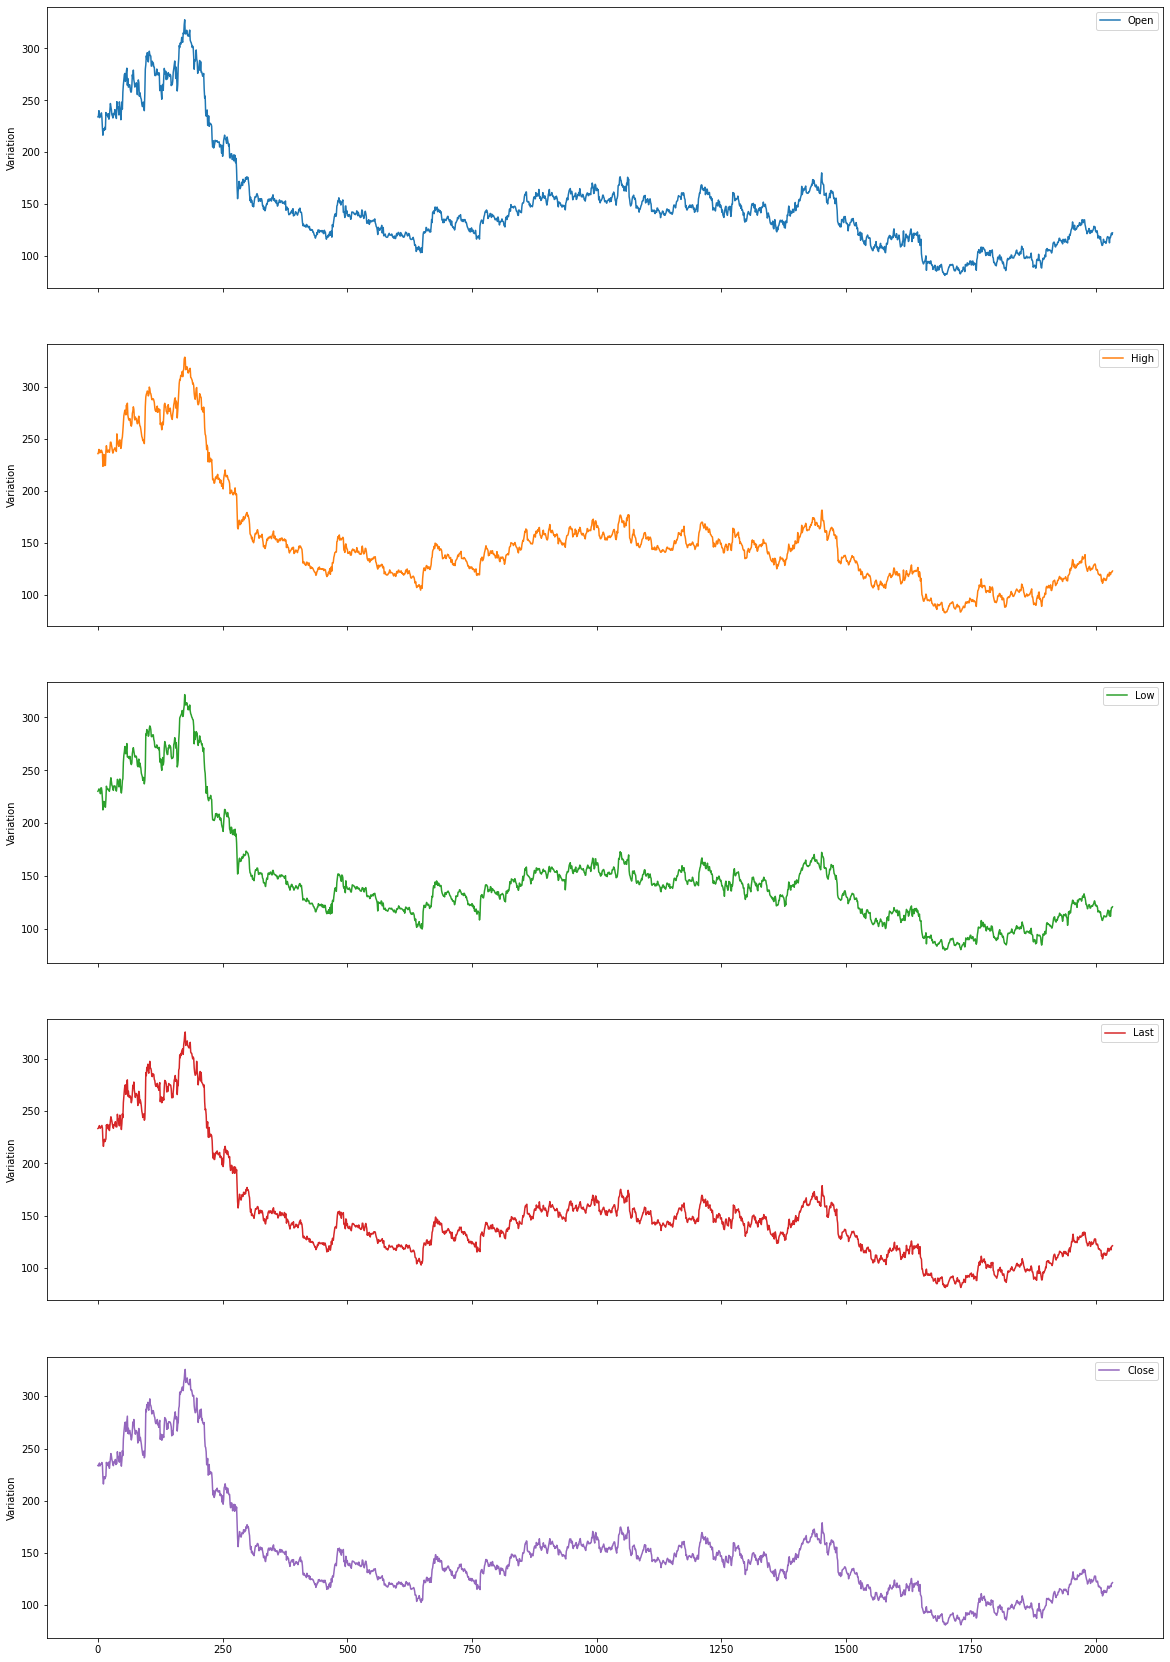

In [93]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


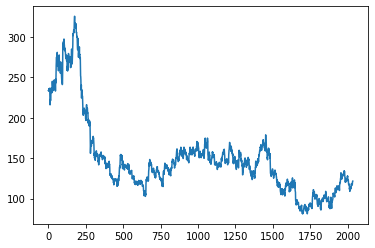

In [113]:
df1=df.reset_index()['Close']
print(df1)
plt.plot(df1)

## LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


## splitting dataset into train and test split

In [115]:
train_size=int(len(df1)*0.75)
test_size=len(df1)-train_size
train_data,test_data=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [116]:
train_size,test_size

(1526, 509)

In [117]:
train_data,test_data

(array([[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.18831699],
        [0.18811275],
        [0.17034314]]), array([[0.1621732 ],
        [0.15972222],
        [0.16278595],
        [0.17340686],
        [0.14174837],
        [0.15441176],
        [0.16503268],
        [0.15563725],
        [0.14460784],
        [0.13684641],
        [0.13582516],
        [0.14072712],
        [0.14501634],
        [0.14195261],
        [0.13562092],
        [0.15053105],
        [0.15727124],
        [0.15461601],
        [0.15767974],
        [0.15114379],
        [0.14297386],
        [0.14215686],
        [0.14787582],
        [0.13970588],
        [0.11642157],
        [0.11131536],
        [0.10927288],
        [0.10334967],
        [0.09783497],
        [0.10089869],
        [0.10906863],
        [0.10171569],
        [0.11254085],
        [0.12704248],
        [0.12214052],
        [0.12704248],
        [0.11519608],
        [0.11008987],
        [0.0996732

## convert an array of values into a dataset matrix

In [118]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return np.array(train_X), np.array(train_Y)
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [119]:
print(X_train.shape), print(y_train.shape)

(1425, 100)
(1425,)


(None, None)

## reshape input to be [samples, time steps, features] which is required for LSTM

In [120]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Design Stacked LSTM Model

In [121]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [122]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
23/23 [==============================] - 11s 247ms/step - loss: 0.0219 - val_loss: 0.0056
Epoch 2/100
23/23 [==============================] - 4s 187ms/step - loss: 0.0026 - val_loss: 7.8180e-04
Epoch 3/100
23/23 [==============================] - 4s 188ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 4s 188ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 5/100
23/23 [==============================] - 4s 188ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 4s 188ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 7/100
23/23 [==============================] - 4s 188ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 4s 187ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/100
23/23 [==============================] - 4s 188ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/100
23/23 [==============================] - 4s 189ms/step - loss: 0.0012 - v

##  Prediction and Check Performance Metrics

In [136]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## Calculate RMSE Performance Metrics

In [137]:
math.sqrt(mean_squared_error(y_train,train_predict))

166.61351963600916

## Test Data RMSE

In [138]:
math.sqrt(mean_squared_error(ytest,test_predict))

106.88831731640009

## Shift Train Predictions for Plotting

In [139]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

## Shift Train Predictions for Plotting

In [140]:
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

## Plot Baseline and Predictions

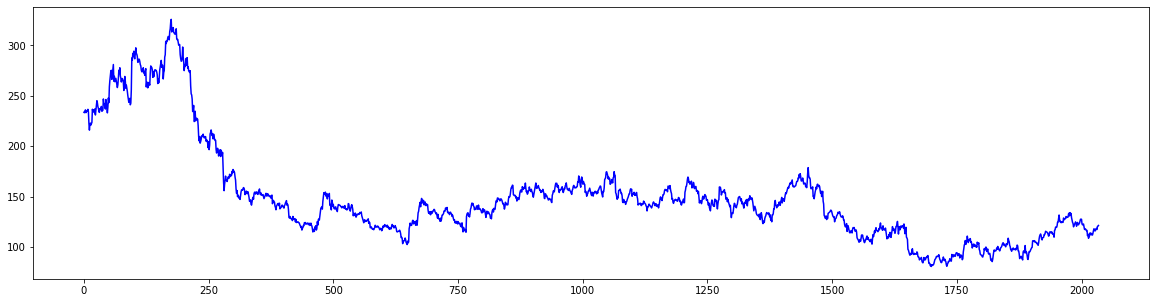

In [147]:
pred  = scaler.inverse_transform(df1)
f= plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(pred,color='blue')
plt.show()

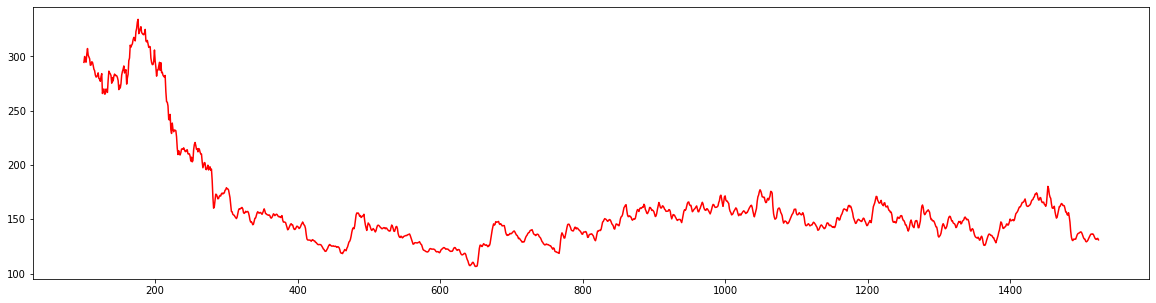

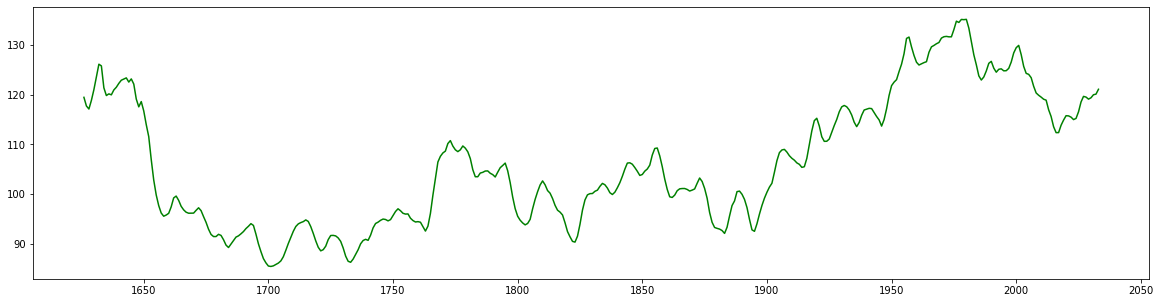

In [149]:
f= plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(trainPredictPlot,color='red')
plt.show()
f= plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(testPredictPlot,color='green')
plt.show()

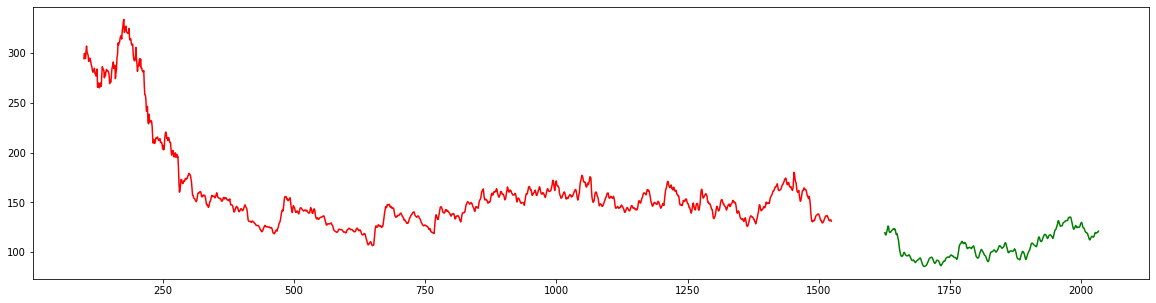

In [145]:
f= plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

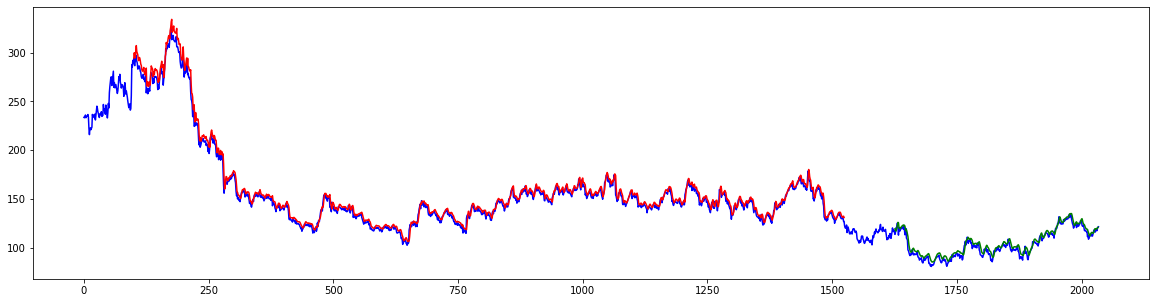

In [143]:
f= plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(pred,color='blue')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [146]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 168)